In [ ]:
!pip install -q kaggle
import json

#Create Credential
######################## Insert Your username and Key ######################
data = {"username": "Khingggwp", "key": "--------------------------------"}
######################## Insert Your username and Key ######################
json_data = json.dumps(data)

# Write the JSON string to a file
file_path = "/content/kaggle.json"
with open(file_path, 'w') as json_file:
    json_file.write(json_data)

In [2]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c io-t-sleep-stage-classification-version-2

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                            Car Price Dataset                                   135KB  2025-01-26 19:53:28          14919        230  1.0              
vinothkannaece/sales-dataset                                        sales dataset                                        27KB  2025-02-18 05:13:42           1738         27  1.0              
adilshamim8/global-traffic-accidents-dataset                        Global Traffic Accidents Dataset                    292KB  2025-02-06 08:18:10           1281         25  1.0              
adilshamim8/sleep-cycle-and-productivity

In [3]:
!unzip /content/io-t-sleep-stage-classification-version-2.zip -d ./data

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
  inflating: ./data/test_segment/test_segment/test003/test003_00692.csv  
  inflating: ./data/test_segment/test_segment/test003/test003_00693.csv  
  inflating: ./data/test_segment/test_segment/test003/test003_00694.csv  
  inflating: ./data/test_segment/test_segment/test003/test003_00695.csv  
  inflating: ./data/test_segment/test_segment/test003/test003_00696.csv  
  inflating: ./data/test_segment/test_segment/test003/test003_00697.csv  
  inflating: ./data/test_segment/test_segment/test003/test003_00698.csv  
  inflating: ./data/test_segment/test_segment/test003/test003_00699.csv  
  inflating: ./data/test_segment/test_segment/test003/test003_00700.csv  
  inflating: ./data/test_segment/test_segment/test004/test004_00000.csv  
  inflating: ./data/test_segment/test_segment/test004/test004_00001.csv  
  inflating: ./data/test_segment/test_segment/test004/test004_00002.csv  
  inflating: ./data/test_segment/test_segment/test004/t

In [63]:
import pandas as pd
import os

dfs = []
for dirname, _, filenames in os.walk('/content/data/train/train'):
    for filename in filenames:
      df = pd.read_csv(os.path.join(dirname, filename))
      dfs.append(df)

In [64]:
len(dfs)

83

In [65]:
from scipy import stats as st

def label(x):
  if x == 'W':
    return 0
  elif x == 'N':
    return 1
  elif x == 'R':
    return 2

train_dfs = []
for df in dfs:
  df['Sleep_Stage'] = df['Sleep_Stage'].apply(label)
  BVP_mean = []
  BVP_std = []
  ACC_X_mean = []
  ACC_X_std = []
  ACC_Y_mean	= []
  ACC_Y_std	= []
  ACC_Z_mean	= []
  ACC_Z_std	= []
  TEMP_mean = []
  TEMP_std = []
  EDA_mean	= []
  EDA_std	= []
  HR_mean = []
  HR_std = []
  IBI_mean	= []
  IBI_std	= []
  Sleep_Stage = []

  for i in range(int(len(df)/(16*30))):
    df_ = df.iloc[(16*30)*i:(16*30)*(i+1)]
    BVP_mean.append(df_['BVP'].mean())
    BVP_std.append(df_['BVP'].std())
    ACC_X_mean.append(df_['ACC_X'].mean())
    ACC_X_std.append(df_['ACC_X'].std())
    ACC_Y_mean.append(df_['ACC_Y'].mean())
    ACC_Y_std.append(df_['ACC_Y'].std())
    ACC_Z_mean.append(df_['ACC_Z'].mean())
    ACC_Z_std.append(df_['ACC_Z'].std())
    TEMP_mean.append(df_['TEMP'].mean())
    TEMP_std.append(df_['TEMP'].std())
    EDA_mean.append(df_['EDA'].mean())
    EDA_std.append(df_['EDA'].std())
    HR_mean.append(df_['HR'].mean())
    HR_std.append(df_['HR'].std())
    IBI_mean.append(df_['IBI'].mean())
    IBI_std.append(df_['IBI'].std())
    mode = st.mode(df_['Sleep_Stage'].values)[0]
    Sleep_Stage.append(mode)

    train_df = pd.DataFrame({
      'BVP_mean': BVP_mean,
      'BVP_std': BVP_std,
      'ACC_X_mean': ACC_X_mean,
      'ACC_X_std': ACC_X_std,
      'ACC_Y_mean': ACC_Y_mean,
      'ACC_Y_std': ACC_Y_std,
      'ACC_Z_mean': ACC_Z_mean,
      'ACC_Z_std': ACC_Z_std,
      'TEMP_mean': TEMP_mean,
      'TEMP_std': TEMP_std,
      'EDA_mean': EDA_mean,
      'EDA_std': EDA_std,
      'HR_mean': HR_mean,
      'HR_std': HR_std,
      'IBI_mean': IBI_mean,
      'IBI_std': IBI_std,
      'Sleep_Stage': Sleep_Stage,})
  train_dfs.append(train_df)

train_dfs

[     BVP_mean   BVP_std  ACC_X_mean     ACC_X_std  ACC_Y_mean     ACC_Y_std  \
 0    0.002283  3.383860  -14.355264  2.246862e+00   30.464842  3.372553e-01   
 1   -0.025429  3.939981   -7.918330  7.599725e-02   30.633918  7.093153e-02   
 2    0.008046  3.051302   -7.908425  9.206072e-10   30.645146  1.546247e-09   
 3   -0.004205  3.023146   -7.976691  2.978066e-01   30.666774  1.738306e-01   
 4    0.008574  3.084063   -9.390520  4.684389e-01   30.620402  2.212602e-01   
 ..        ...       ...         ...           ...         ...           ...   
 745  0.012580  2.513793  -16.255838  3.655098e-01   29.656593  1.916818e-13   
 746 -0.005946  3.118393  -16.620028  2.885427e-01   29.656593  3.793936e-07   
 747  0.007874  2.892407  -16.798194  5.382285e-02   29.652494  4.066762e-02   
 748 -0.003806  2.673633  -16.802313  3.326774e-02   29.650389  4.959634e-02   
 749 -0.003845  3.169742  -16.806432  2.039451e-02   29.653509  3.524313e-02   
 
      ACC_Z_mean     ACC_Z_std  TEMP_m

In [66]:
TRAIN_DF = pd.concat(train_dfs,ignore_index=True)

In [67]:
TRAIN_DF

,BVP_mean,BVP_std,ACC_X_mean,ACC_X_std,ACC_Y_mean,ACC_Y_std,ACC_Z_mean,ACC_Z_std,TEMP_mean,TEMP_std,EDA_mean,EDA_std,HR_mean,HR_std,IBI_mean,IBI_std,Sleep_Stage
0,0.002283,3.383860,-14.355264,2.246862e+00,30.464842,3.372553e-01,53.265734,4.303977e-01,33.251327,0.015808,0.278338,0.000966,87.770919,0.309035,0.695563,0.060993,0
1,-0.025429,3.939981,-7.918330,7.599725e-02,30.633918,7.093153e-02,54.370599,2.951460e-02,33.247007,0.010611,0.278222,0.000942,85.346157,0.670949,0.662285,0.024714,0
2,0.008046,3.051302,-7.908425,9.206072e-10,30.645146,1.546247e-09,54.370420,3.540594e-13,33.250310,0.011317,0.278463,0.001027,86.351191,0.622846,0.690332,0.041868,0
3,-0.004205,3.023146,-7.976691,2.978066e-01,30.666774,1.738306e-01,54.344668,1.228759e-01,33.248338,0.011480,0.279496,0.001016,86.280444,0.282093,0.674612,0.034474,0
4,0.008574,3.084063,-9.390520,4.684389e-01,30.620402,2.212602e-01,54.303442,2.606098e-01,33.250956,0.011554,0.279994,0.001127,87.172275,0.831601,0.651758,0.045911,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66468,0.097355,22.422033,-9.843343,1.450784e-01,37.415862,2.357052e-01,50.569705,2.295617e-01,35.021138,0.016969,0.109874,0.001018,64.121932,1.776997,1.032798,0.027301,0
66469,-0.014880,21.849281,-9.637162,4.689860e-01,37.409413,2.638515e-01,50.597532,2.799304e-01,35.059321,0.011040,0.109759,0.001072,59.619123,0.770192,0.914125,0.064365,0
66470,0.039981,22.680456,-9.811608,2.573081e-01,37.121866,4.116874e-01,50.730069,3.345209e-01,35.097558,0.020942,0.107185,0.001081,61.567261,0.730954,0.992246,0.090434,0
66471,-0.028857,22.682729,-7.978950,3.910201e-01,37.578745,1.900255e-01,50.536733,2.293184e-01,35.142043,0.016558,0.107372,0.000983,60.747525,1.168669,1.059332,0.017257,0


In [68]:
!pip install catboost -q

In [69]:
X = TRAIN_DF.drop('Sleep_Stage', axis=1)
y = TRAIN_DF['Sleep_Stage']

print(X)
print(y)

       BVP_mean    BVP_std  ACC_X_mean     ACC_X_std  ACC_Y_mean  \
0      0.002283   3.383860  -14.355264  2.246862e+00   30.464842   
1     -0.025429   3.939981   -7.918330  7.599725e-02   30.633918   
2      0.008046   3.051302   -7.908425  9.206072e-10   30.645146   
3     -0.004205   3.023146   -7.976691  2.978066e-01   30.666774   
4      0.008574   3.084063   -9.390520  4.684389e-01   30.620402   
...         ...        ...         ...           ...         ...   
66468  0.097355  22.422033   -9.843343  1.450784e-01   37.415862   
66469 -0.014880  21.849281   -9.637162  4.689860e-01   37.409413   
66470  0.039981  22.680456   -9.811608  2.573081e-01   37.121866   
66471 -0.028857  22.682729   -7.978950  3.910201e-01   37.578745   
66472 -0.135499  21.560879   -7.928965  9.095947e-02   37.569137   

          ACC_Y_std  ACC_Z_mean     ACC_Z_std  TEMP_mean  TEMP_std  EDA_mean  \
0      3.372553e-01   53.265734  4.303977e-01  33.251327  0.015808  0.278338   
1      7.093153e-02   5

<Axes: >

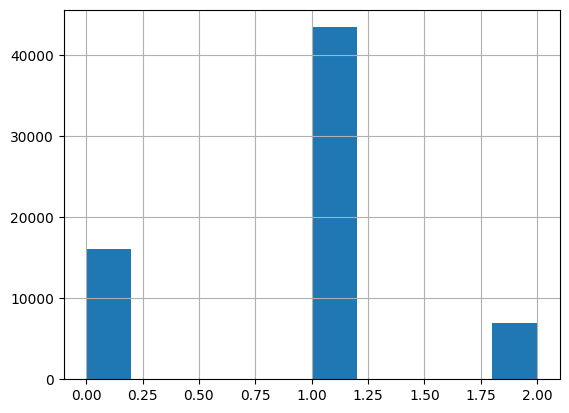

In [70]:
y.hist()

In [71]:
from catboost import CatBoostClassifier, cv, Pool
import numpy as np
from sklearn.model_selection import train_test_split

# x_train, x_val, y_train, y_val = train_test_split(train_df, target_df, test_size=0.2, random_state=42)

# # Fit model
# model.fit(x_train, y_train, eval_set=(x_val, y_val))


# model = CatBoostClassifier(
#     iterations=100, depth=6, learning_rate=0.1,
#    loss_function='MultiClass', verbose=False)
# model.fit(X_train, y_train)

params = {}
params['loss_function'] = 'MultiClass'
params['custom_metric'] = ['Accuracy', 'F1']
# params['eval_metric'] = 'F1'
params['depth'] = 10
params['iterations'] = 200
params['random_seed'] = 112
params['learning_rate'] = 0.5

cv_data = cv(
    params = params,
    pool = Pool(X, label=y),
    fold_count=10,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False
)


Training on fold [0/10]

bestTest = 0.3652700548
bestIteration = 198

Training on fold [1/10]

bestTest = 0.3997741383
bestIteration = 185

Training on fold [2/10]

bestTest = 0.3716585541
bestIteration = 192

Training on fold [3/10]

bestTest = 0.3965841256
bestIteration = 184

Training on fold [4/10]

bestTest = 0.3869102626
bestIteration = 174

Training on fold [5/10]

bestTest = 0.3762943538
bestIteration = 190

Training on fold [6/10]

bestTest = 0.3746377748
bestIteration = 197

Training on fold [7/10]

bestTest = 0.3695206051
bestIteration = 199

Training on fold [8/10]

bestTest = 0.3781825603
bestIteration = 181

Training on fold [9/10]

bestTest = 0.3773067276
bestIteration = 198



In [72]:
cv_data

,iterations,test-MultiClass-mean,test-MultiClass-std,train-MultiClass-mean,train-MultiClass-std,test-Accuracy-mean,test-Accuracy-std,train-Accuracy-mean,train-Accuracy-std,test-F1-mean,test-F1-std,train-F1-mean,train-F1-std
0,0,0.852242,0.004301,0.848263,0.001717,0.698976,0.006218,0.703405,0.001300,NaN,NaN,NaN,NaN
1,1,0.785012,0.007192,0.776662,0.005137,0.702902,0.006084,0.707248,0.002152,NaN,NaN,NaN,NaN
2,2,0.736151,0.006162,0.723991,0.003982,0.708784,0.005579,0.714867,0.002155,NaN,NaN,NaN,NaN
3,3,0.703692,0.009040,0.688468,0.007049,0.714937,0.005844,0.722788,0.003001,NaN,NaN,NaN,NaN
4,4,0.676052,0.010386,0.656123,0.010329,0.721812,0.006766,0.732060,0.004613,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0.380323,0.011763,0.138355,0.002779,0.853264,0.004456,0.973727,0.001139,NaN,NaN,NaN,NaN
196,196,0.380386,0.011737,0.137639,0.002842,0.853143,0.004688,0.974038,0.001134,NaN,NaN,NaN,NaN
197,197,0.380259,0.011870,0.137156,0.002764,0.853219,0.004751,0.974180,0.001076,NaN,NaN,NaN,NaN
198,198,0.380158,0.011800,0.136537,0.002776,0.853173,0.004888,0.974427,0.001051,NaN,NaN,NaN,NaN


In [73]:
best_value = np.max(cv_data['test-Accuracy-mean'])
best_iter = np.argmax(cv_data['test-Accuracy-mean'])

print('Best validation ACC score, stratified: {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-Accuracy-std'][best_iter],
    best_iter)
)

Best validation ACC score, stratified: 0.8535±0.0046 on step 199


In [74]:
model = CatBoostClassifier(iterations=2000,
                           learning_rate=0.01,
                           loss_function='MultiClass', # objective function
                           depth=6,
                           random_seed = 225,
                           verbose = 100
                           )

model.fit(X, y)

0:	learn: 1.0920745	total: 34.5ms	remaining: 1m 9s
100:	learn: 0.8131298	total: 6.51s	remaining: 2m 2s
200:	learn: 0.7497208	total: 14.9s	remaining: 2m 13s
300:	learn: 0.7207911	total: 18.2s	remaining: 1m 42s
400:	learn: 0.7000363	total: 21.4s	remaining: 1m 25s
500:	learn: 0.6820281	total: 25.8s	remaining: 1m 17s
600:	learn: 0.6670077	total: 29s	remaining: 1m 7s
700:	learn: 0.6532505	total: 32.3s	remaining: 59.8s
800:	learn: 0.6407916	total: 36.6s	remaining: 54.7s
900:	learn: 0.6300691	total: 40s	remaining: 48.7s
1000:	learn: 0.6192581	total: 43.2s	remaining: 43.1s
1100:	learn: 0.6098459	total: 46.4s	remaining: 37.9s
1200:	learn: 0.6008106	total: 50.7s	remaining: 33.7s
1300:	learn: 0.5920207	total: 53.9s	remaining: 29s
1400:	learn: 0.5833554	total: 57.2s	remaining: 24.4s
1500:	learn: 0.5755607	total: 1m 1s	remaining: 20.4s
1600:	learn: 0.5675311	total: 1m 4s	remaining: 16.1s
1700:	learn: 0.5604241	total: 1m 8s	remaining: 12s
1800:	learn: 0.5536600	total: 1m 11s	remaining: 7.87s
1900:	l

In [75]:
test_0 = []
for i in range(10):
  if i<9:
    directory = '/content/data/test_segment/test_segment/test00'+str(i+1)
  else:
    directory = '/content/data/test_segment/test_segment/test010'

  BVP_mean = []
  BVP_std = []
  ACC_X_mean = []
  ACC_X_std = []
  ACC_Y_mean	= []
  ACC_Y_std	= []
  ACC_Z_mean	= []
  ACC_Z_std	= []
  TEMP_mean = []
  TEMP_std = []
  EDA_mean	= []
  EDA_std	= []
  HR_mean = []
  HR_std = []
  IBI_mean	= []
  IBI_std	= []
  for filename in sorted(os.listdir(directory)):
      f = os.path.join(directory, filename)
      test_df = pd.read_csv(f)

      BVP_mean.append(test_df['BVP'].mean())
      BVP_std.append(test_df['BVP'].std())
      ACC_X_mean.append(test_df['ACC_X'].mean())
      ACC_X_std.append(test_df['ACC_X'].std())
      ACC_Y_mean.append(test_df['ACC_Y'].mean())
      ACC_Y_std.append(test_df['ACC_Y'].std())
      ACC_Z_mean.append(test_df['ACC_Z'].mean())
      ACC_Z_std.append(test_df['ACC_Z'].std())
      TEMP_mean.append(test_df['TEMP'].mean())
      TEMP_std.append(test_df['TEMP'].std())
      EDA_mean.append(test_df['EDA'].mean())
      EDA_std.append(test_df['EDA'].std())
      HR_mean.append(test_df['HR'].mean())
      HR_std.append(test_df['HR'].std())
      IBI_mean.append(test_df['IBI'].mean())
      IBI_std.append(test_df['IBI'].std())

  print(len(BVP_mean))
  test_df_1 = pd.DataFrame({
  'BVP_mean': BVP_mean,
  'BVP_std': BVP_std,
  'ACC_X_mean': ACC_X_mean,
  'ACC_X_std': ACC_X_std,
  'ACC_Y_mean': ACC_Y_mean,
  'ACC_Y_std': ACC_Y_std,
  'ACC_Z_mean': ACC_Z_mean,
  'ACC_Z_std': ACC_Z_std,
  'TEMP_mean': TEMP_mean,
  'TEMP_std': TEMP_std,
  'EDA_mean': EDA_mean,
  'EDA_std': EDA_std,
  'HR_mean': HR_mean,
  'HR_std': HR_std,
  'IBI_mean': IBI_mean,
  'IBI_std': IBI_std,
  })

  test_0.append(test_df_1)
  print(len(test_0))

701
1
701
2
701
3
701
4
701
5
701
6
701
7
701
8
701
9
701
10


In [76]:
answers = []
for dataset in test_0:
  pred = model.predict(dataset)
  answers.extend(pred)

In [77]:
answer_np = np.array(answers)
answer_np.reshape(7010)
answer_np.shape

(7010, 1)

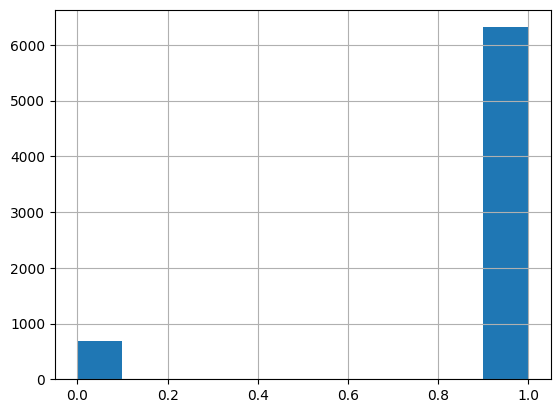

In [78]:
submission = pd.read_csv('/content/data/sample_submission.csv')
submission['labels'] = answer_np
submission['labels'].hist()
submission['labels'] = submission['labels'].map({0:'W', 1:'N', 2:'R'})
submission.to_csv('submission_signal16hz.csv', index=False)

In [79]:
submission

,id,labels
0,test001_00000,N
1,test001_00001,W
2,test001_00002,N
3,test001_00003,N
4,test001_00004,N
...,...,...
7005,test010_00696,N
7006,test010_00697,N
7007,test010_00698,N
7008,test010_00699,W
